In [3]:
!wget https://www.machinehack.com/wp-content/uploads/2020/06/Used_Electronics_Participants_Data.zip

--2020-06-08 06:47:32--  https://www.machinehack.com/wp-content/uploads/2020/06/Used_Electronics_Participants_Data.zip
Resolving www.machinehack.com (www.machinehack.com)... 107.180.71.20
Connecting to www.machinehack.com (www.machinehack.com)|107.180.71.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184210 (180K) [application/zip]
Saving to: ‘Used_Electronics_Participants_Data.zip’

Used_Electronics_Pa 100%[===================>] 179.89K   427KB/s    in 0.4s    

2020-06-08 06:47:33 (427 KB/s) - ‘Used_Electronics_Participants_Data.zip’ saved [184210/184210]



In [4]:
!unzip Used_Electronics_Participants_Data.zip

Archive:  Used_Electronics_Participants_Data.zip
   creating: Used_Electronics_Participants_Data/
  inflating: Used_Electronics_Participants_Data/Test.csv  
  inflating: __MACOSX/Used_Electronics_Participants_Data/._Test.csv  
  inflating: Used_Electronics_Participants_Data/Sample_Submission.xlsx  
  inflating: __MACOSX/Used_Electronics_Participants_Data/._Sample_Submission.xlsx  
  inflating: Used_Electronics_Participants_Data/Train.csv  
  inflating: __MACOSX/Used_Electronics_Participants_Data/._Train.csv  


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv('Used_Electronics_Participants_Data/Train.csv')
test = pd.read_csv('Used_Electronics_Participants_Data/Test.csv')

In [7]:
train.head(5)

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499


In [8]:
test.tail(5)

,Brand,Model_Info,Additional_Description,Locality,City,State
992,1,name0 7 32gb sale accessories,wife upgrading mobile 10100000 x 101009600 sp...,796,4,0
993,1,name233 8 pro 6gb ram 128gb rom 1year old mobile,101004800 1010036800 1 month 12 days old 1010...,145,17,7
994,0,name233 name2815 6 gb ram 128 gb rom blue 3 m...,10100105200 leeco 1010018400 10100221100 1010...,352,13,5
995,1,name269 phone 6,phone best condition 101006600 device selling...,350,4,0
996,1,name0 7 red 128 gb,1010023300 9 10100148200 good condition compl...,602,11,4


In [9]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(Brand                     0
 Model_Info                0
 Additional_Description    0
 Locality                  0
 City                      0
 State                     0
 Price                     0
 dtype: int64, Brand                     0
 Model_Info                0
 Additional_Description    0
 Locality                  0
 City                      0
 State                     0
 dtype: int64, (2326, 7), (997, 6), Brand                      int64
 Model_Info                object
 Additional_Description    object
 Locality                   int64
 City                       int64
 State                      int64
 Price                      int64
 dtype: object)

In [0]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

train['Additional_Description'] = train['Additional_Description'].apply(clean_text)
test['Additional_Description'] = test['Additional_Description'].apply(clean_text)

In [0]:
df=train.append(test,ignore_index=True)

In [0]:
m=[]
for i in df['Model_Info']:
  k=list(map(str, i.strip().split(' ')))
  k.sort()
  k=str(k)
  m.append(k)
df['Model_Info']=m


In [0]:
i=list(range(0, 3323))
df['title']=i

In [0]:
import re
go_tags=df.copy()
def clean_tag(tag):
    tag = re.sub(r"[\'\[\]]","",tag)
    tag = re.sub(r'\s','',tag)
    tag = re.sub(r'\"','',tag)
    return tag
go_tags['Model_Info']=go_tags['Model_Info'].apply(lambda x: clean_tag(x))

temp=go_tags['Model_Info'].str.split(',')

go_tags=go_tags.reindex(go_tags.index.repeat(temp.apply(len)))
go_tags['Model_Info_new'] = np.hstack(temp)
go_tags=go_tags[['title','Model_Info_new']]
go_tags=pd.crosstab(go_tags.title,go_tags.Model_Info_new)
go_tags.head()

Model_Info_new,040519,1,10,100,1000,10000,10months,10x,10xmax,11,116gb,11900,11pro,12,12000,123,124,12500,128,128gb,128gb25000₹,128gbname54,128gib,128gigs,129,12900,12999,12999rs,12months,12yr,13,13000rs,131,131updated,132mp,13900,13mp,14,14000,14499,...,wireless,withbox,within,without,woratty,work,working,wrnty,x,x2,x256gb,x64gb,xcell,xr,xr128gb,xrproduct,xs,xs64gb,xsmax,xsmaxglittering,xt19023,y9,yea,year,years,yes,yr,yrs,z,z1,z2,zed,zero,zet,zuk,¶¶,—,•,₹30000,➖32gb
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df=df.merge(go_tags, on='title', how='left')

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import string
punctuation=string.punctuation
df['word_count']=df['Additional_Description'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['Additional_Description'].str.len()
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['Additional_Description'].apply(lambda x: avg_word(x))
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['Additional_Description'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['numerics'] = df['Additional_Description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['upper'] = df['Additional_Description'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['word_density'] = df['char_count'] / (df['word_count']+1)
df['punctuation_count'] = df['Additional_Description'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

In [0]:
train = df[df['Price'].isnull()==False]
test = df[df['Price'].isnull()==True]

In [0]:
del train['Model_Info']
del test['Model_Info']
del train['title']
del test['title']
del train['Additional_Description']
del test['Additional_Description']
del test['Price']

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
train_df=train

In [0]:
X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42)

In [0]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((1977, 1659), (1977,), (349, 1659), (349,))

In [0]:

from math import sqrt 
from sklearn.metrics import mean_squared_log_error

In [0]:
'''
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.001, 
         'num_iterations': 3500,
         'num_leaves': 80,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred_lgbm)))
'''
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred_lgbm)))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 12302.5
[200]	valid_0's rmse: 10309.9
[300]	valid_0's rmse: 9827.59
[400]	valid_0's rmse: 9669.06
[500]	valid_0's rmse: 9601.45
[600]	valid_0's rmse: 9574.15
[700]	valid_0's rmse: 9570.69
Early stopping, best iteration is:
[670]	valid_0's rmse: 9564.47
RMSLE: 0.4672806789163651


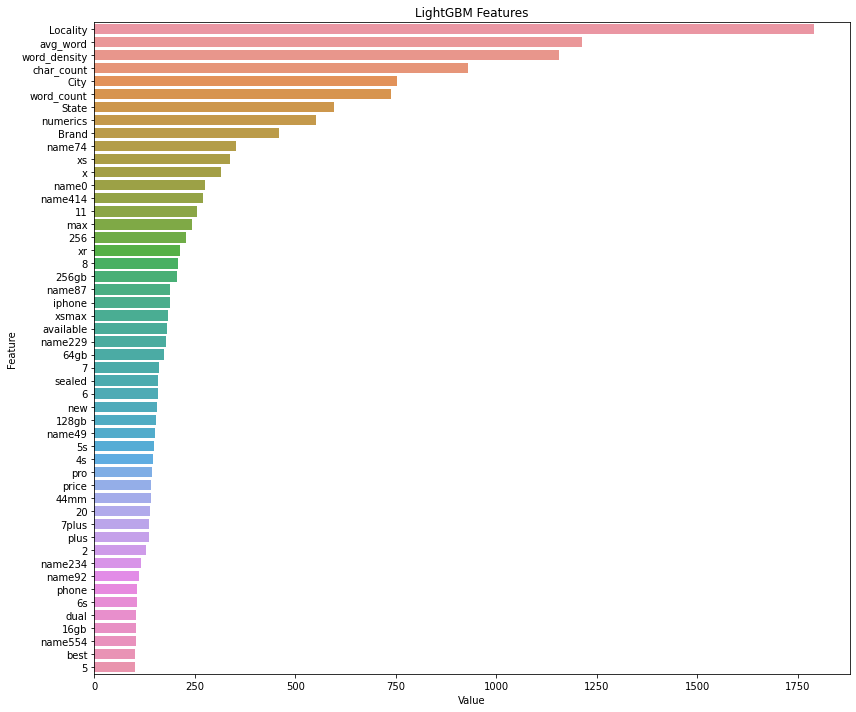

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test

In [0]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=30, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    #lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=500, max_depth=31, learning_rate=0.07, n_estimators=2000, min_child_samples=20, subsample=0.80)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(y_test,y_pred_lgbm)))

    errlgb.append(sqrt(mean_squared_log_error(y_test,y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.5730126872952283


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.3642792717706902


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.3536937182913547


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.367785561074817


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.5921712193921056


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


KeyboardInterrupt: ignored

In [0]:
np.mean(errlgb,0)

0.45018849156483914

In [0]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([ 18559.90655812,  11931.79347186,  15998.689919  ,  45742.60252838,
         8815.8819486 ,  26380.6583847 ,  16450.82536866,  12252.640109  ,
        16567.30754444,  20036.73906691,  24880.19635619,  17968.50613382,
        19182.85537638,  14668.67181723,  59994.3554487 ,   7659.58579248,
        23334.91032146,  18367.62414472,   2971.64045814,  18301.37414208,
        31297.60846842,   7517.78027314,  19882.15423648,  19690.64048639,
        12366.42107597,  24455.7484201 ,  19482.02069769,  21093.88759601,
        47811.03288156,  15173.09375833,  27270.24597844,  11564.59529518,
        33745.31190032,  11346.63744051,  19536.44659333,  70671.12154849,
        20447.47517022,  13339.00341119,  12681.01547524,  26597.78624486,
        32133.56831229,  50731.45900192,   3308.51759555,  24646.5762027 ,
        11314.17785382,   4816.7103581 ,  24116.56220232,  10913.49249104,
        12113.53051673,   8529.12905003,   5737.09181721,  43492.58207083,
        11174.35084584,  

In [0]:
submission = pd.DataFrame({
        "Price": abs(lgbm_final)
    })
submission.to_excel('./fin.xlsx', index=False)
print(submission)

            Price
0    18559.906558
1    11931.793472
2    15998.689919
3    45742.602528
4     8815.881949
..            ...
992  20526.079163
993  36554.554414
994  10936.683396
995  12435.297896
996  23870.342213

[997 rows x 1 columns]


In [0]:
from google.colab import files
files.download('fin.xlsx')

# gbm

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.2, n_estimators=500, random_state=42, subsample=0.8)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('RMSLE', sqrt(mean_squared_log_error(y_cv, y_pred)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1   372612217.0112    94258500.1998           14.03s
         2   320649732.5270    46886035.2055           14.27s
         3   262539867.6771    50136230.2702           13.99s
         4   226811580.1745    26925666.1684           13.94s
         5   217868163.0223    21261768.2231           13.86s
         6   189556118.8782    14242657.5953           13.75s
         7   184983200.9415    12693227.9473           13.72s
         8   169605812.2738    11571483.9647           13.85s
         9   158447435.9286     9386505.7014           13.81s
        10   144979054.3497     2977030.7878           13.77s
        20   101396035.5438     2905912.0227           13.50s
        30    84144652.1941      -13573.6209           13.29s
        40    73408048.1586     1218250.8359           13.03s
        50    61861747.5050     -213489.9943           12.68s
        60    60059719.9671       38876.3556           12.42s
       

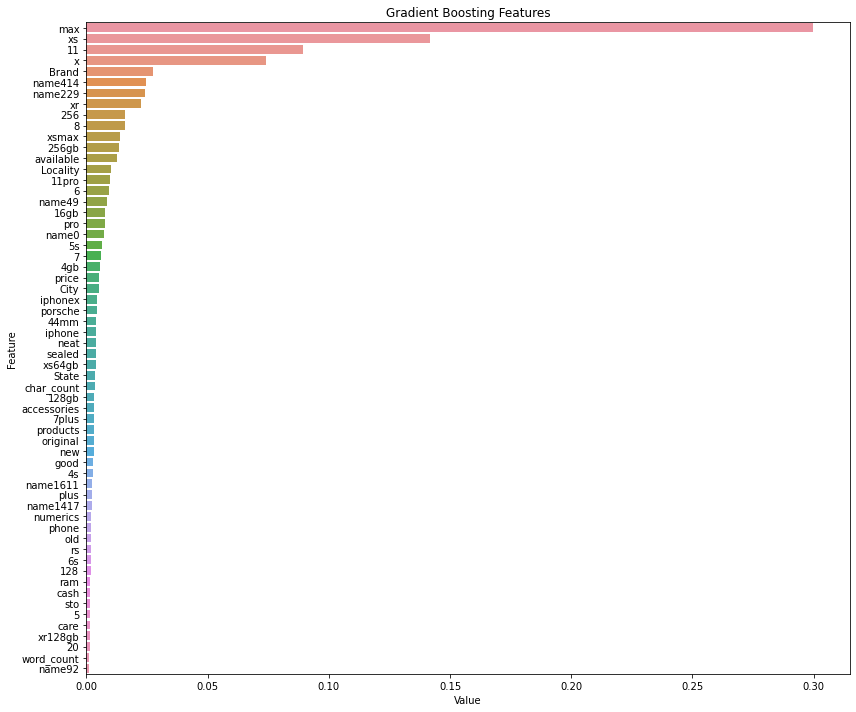

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test

In [0]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)#42

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, random_state=42, subsample=0.9) #42        
    gb = GradientBoostingRegressor(learning_rate=0.2, n_estimators=500, random_state=42, subsample=0.8)
    #gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, random_state=42, subsample=0.8)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('RMSE', sqrt(mean_squared_log_error(y_test, y_pred)))

    errgb.append(sqrt(mean_squared_log_error(y_test, y_pred)))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

ValueError: ignored

In [0]:
np.mean(errgb)

0.4396340694317682

In [0]:
final = np.mean(y_pred_totgb,0)
final

array([ 1.71431167e+04,  1.61798531e+04,  1.38198894e+04,  4.48805959e+04,
        8.17019250e+03,  2.88845698e+04,  1.70436614e+04,  1.17876773e+04,
        1.57562747e+04,  1.89407945e+04,  1.94583315e+04,  1.66161163e+04,
        1.38290353e+04,  1.35799798e+04,  5.43326368e+04,  6.96469200e+03,
        2.40220094e+04,  1.14211446e+04,  5.31188020e+03,  1.27825016e+04,
        2.63211539e+04,  7.43126018e+03,  2.15552129e+04,  1.52178288e+04,
        1.23099663e+04,  2.32059701e+04,  2.88490113e+04,  2.44667093e+04,
        5.29874123e+04,  1.77647120e+04,  2.21482455e+04,  1.27154402e+04,
        3.54816362e+04,  1.08250415e+04,  1.67785672e+04,  7.07156266e+04,
        1.96358858e+04,  1.33503194e+04,  1.33731242e+04,  2.60323686e+04,
        4.08044212e+04,  4.44169636e+04,  2.98516267e+03,  4.25705696e+04,
        9.67293079e+03,  3.14822354e+03,  2.36726177e+04,  7.57566748e+03,
        1.23788597e+04,  8.85452156e+03,  4.47313405e+03,  4.40766116e+04,
        9.31205733e+03,  

In [0]:
submission = pd.DataFrame({
        "Price": abs(final)
    })
submission.to_excel('./based_adv.xlsx', index=False)
print(submission)

            Price
0    17143.116716
1    16179.853109
2    13819.889365
3    44880.595908
4     8170.192497
..            ...
992  19863.186630
993  52530.602544
994  11792.527548
995  10465.984911
996  24598.347044

[997 rows x 1 columns]


In [0]:
from google.colab import files
files.download('based_adv.xlsx')

# ensem

In [0]:
from google.colab import files
files.upload()

Saving based_adv.xlsx to based_adv (1).xlsx
Saving based_dir.xlsx to based_dir (1).xlsx
Saving based_ml.xlsx to based_ml (1).xlsx


{'based_adv.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x003\x91\xc7P\x1f#\xcf\x03\xc0\x00\x00\x00\x13\x02\x00\x00\x0b\x00\x00\x00_rels/.rels\xad\x92O\x8b\xc2@\x0c\xc5\xbfJ\x99\xfb\x1aW\xc1\xc3b=y\xe9mY\xfc\x02q&\xfdC;\x93!\x13\xb1~{\x87\xbdl\xb7TP\xf0\x18^\xf2\xde\x8fG\xf6?4\xa0v\x1cR\xdb\xc5T\x8c~\x08\xa94\xadj\xfc\x02H\xb6%\x8fi\xc5\x91BVj\x16\x8f\x9aGi \xa2\xed\xb1!\xd8\xac\xd7;\x90\xa9\x879\xec\xa7\x9eE\xe5J#\x95\xfb4\xc5\t\xa5!-\xcd8\xc0\x95\xa5?3\xf7\xabl\x9b\x85[\xa4gB\xb9\xae;KG\xb6\x17OA\x17\xb2g\x1b\x06\x96Y6\x7f,\x8e\xed\xb7p\xbe\xb4,\xf4\x1a\xcd\xe3\n\xc0\x93\xa2C\xc5_\xd7\x8f\x98\x03H\xb4\xa3\xf4\x08h\xbb\x00\x841\xbe\xbb\x1d\x1a\x95\x82#7#\x82\x7f?p\xb8\x03PK\x03\x04\x14\x00\x00\x00\x08\x003\x91\xc7P\'\xe8\x87\x0e\x82\x00\x00\x00\xb1\x00\x00\x00\x10\x00\x00\x00docProps/app.xmlM\x8eM\x0b\xc20\x10D\xffJ\xe9\xddn)\xe8Ab@\xb0G\xc1\x93\xf7\x90nl \xc9\x86\xcd\n\xf9\xf9\xa6\x82\x1f\xb7y\xbca\x18uc\xca\xc8\xe2\xb1t5\x86TN\xfd*\x92\x8f\x00\xc5\xae\x18M\x19\x9aN\xcd8\xe2h\xa4!?\x80\x9

In [0]:
a=pd.read_excel('gbmff.xlsx')

In [0]:
c=pd.read_excel('based_dir.xlsx')
d=pd.read_excel('based_adv.xlsx')
e=pd.read_excel('based_ml.xlsx')


In [0]:
a['Price']=a['Price']*.75+c['Price']*.10+d['Price']*.8+e['Price']*.7

In [0]:
a.to_excel('ensemble_x.xlsx',index=False)

In [0]:
from google.colab import files
files.download('ensemble_x.xlsx')